Opis każdej zmiennej:

X1 - Transaction Date:
Rok dokonania transakcji dotyczącej nieruchomości
 Zmienna numeryczna.

X2 - House Age:
Wiek nieruchomości
 Zmienna numeryczna.

X3 - Distance to the Nearest MRT Station:
Odległość między nieruchomością a najbliższą stacją metra.
 Zmienna numeryczna.

X4 - Number of Convenience Stores:
Liczba sklepów w pobliżu nieruchomości.
 Zmienna numeryczna.

X5 - Latitude:
Szerokość geograficzna lokalizacji nieruchomości.
 Zmienna numeryczna.

X6 - Longitude:
Długość geograficzna lokalizacji nieruchomości.
 Zmienna numeryczna.

Y - House Price of Unit Area:
Cena nieruchomości za jednostkę powierzchni.
 Zmienna numeryczna - zmienna zalezna, ktora objasniamy przez zmienne niezalezne w analizie.



In [26]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import statsmodels.api as sm

In [28]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
data = pd.read_csv('Real estate.csv')
data =  data.iloc[:, 1:]
data.to_csv('RE.csv', index=False)
#Zmienne zostały zmienione, tak aby nie zawierały pierwszej kolumny, poniewaz byla ona No i nic nie wnosiła do danych.

In [65]:
data.head()
#komenda pokazuje mi fragment dataframeu

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [66]:
#sprawdzam jakiego typu mam zmienne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [67]:
data.describe()
#tutaj sprawdzam statystyki opisowe  

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


OPIS STATYSTYK OPISOWYCH ZMIENNYCH :

Wszytskie miały 414 obserwacji.

X1 - Transaction Date 

mean: Średnia wartość daty transakcji wynosi około 2013.15

std: Odchylenie standardowe wynosi około 0.28, co oznacza niewielką zmienność w danych daty transakcji.

min: Najwcześniejsza data transakcji to około 2012.67

25%: 25% obserwacji ma datę transakcji do 2012.92

50%: Mediana daty transakcji to około 2013.17

75%: 75% obserwacji ma datę transakcji do 2013.42

max: Najpóźniejsza data transakcji to około 2013.58

X2 - House Age

mean: Średni wiek domu wynosi około 17.71 lat

std: Odchylenie standardowe wieku domu wynosi około 11.39 , duza zmienność

min: Najmłodszy dom ma 0 lat

25%: 25% domów ma wiek do 9.03 lat

50%: Mediana wieku domu wynosi około 16.10 lat

75%: 75% domów ma wiek do 28.15 lat

max: Najstarszy dom ma 43.80 lat


X3 - Distance to the Nearest MRT Station

mean: Średnia odległość do stacji MRT wynosi około 1083.89 , duza zmienność

std: Odchylenie standardowe odległości do stacji MRT wynosi około 1262.11

min: Najmniejsza odległość wynosi około 23.38

25%: 25% nieruchomości ma odległość do stacji MRT do 289.32

50%: Mediana odległości do stacji MRT wynosi około 492.23

75%: 75% nieruchomości ma odległość do stacji MRT do 1454.28

max: Największa odległość wynosi około 6488.02

X4 - Number of Convenience Stores 

mean: Średnia liczba sklepów wynosi około 4.09

std: Odchylenie standardowe liczby sklepów wynosi około 2.95 , umiarkowane

min: Najmniejsza liczba sklepów wynosi 0

25%: 25% obserwacji ma liczbę sklepów równą 1

50%: Mediana liczby sklepów wynosi około 4

75%: 75% obserwacji ma liczbę sklepów do 6

max: Największa liczba sklepów wynosi 10

X5 - Latitude 

mean: Średnia szerokość geograficzna wynosi około 24.97

std: Odchylenie standardowe szerokości geograficznej wynosi około 0.01 , niewielka zmiennosc

min: Najmniejsza szerokość geograficzna wynosi około 24.93

25%: 25% obserwacji ma szerokość geograficzną do 24.96

50%: Mediana szerokości geograficznej wynosi około 24.97

75%: 75% obserwacji ma szerokość geograficzną do 24.98

max: Największa szerokość geograficzna wynosi około 25.01

X6 - Longitude 

mean: Średnia długość geograficzna wynosi około 121.53

std: Odchylenie standardowe długości geograficznej wynosi około 0.02 , niewielka zmiennosc

min: Najmniejsza długość geograficzna wynosi około 121.47

25%: 25% obserwacji ma długość geograficzną do 121.53

50%: Mediana długości geograficznej wynosi około 121.54

75%: 75% obserwacji ma długość geograficzną do 121.54

max: Największa długość geograficzna wynosi około 121.57

Y - House Price of Unit Area 

mean: Średnia cena jednostkowa nieruchomości wynosi około 37.98

std: Odchylenie standardowe ceny jednostkowej nieruchomości wynosi około 13.61, większą zmienność cen jednostkowych nieruchomości względem ich średniej wartości

min: Najniższa cena jednostkowa nieruchomości wynosi około 7.60

25%: 25% nieruchomości ma cenę jednostkową do 27.70

50%: Mediana ceny jednostkowej nieruchomości wynosi około 38.45

75%: 75% nieruchomości ma cenę jednostkową do 46.60

max: Najwyższa cena jednostkowa nieruchomości wynosi około 117.50


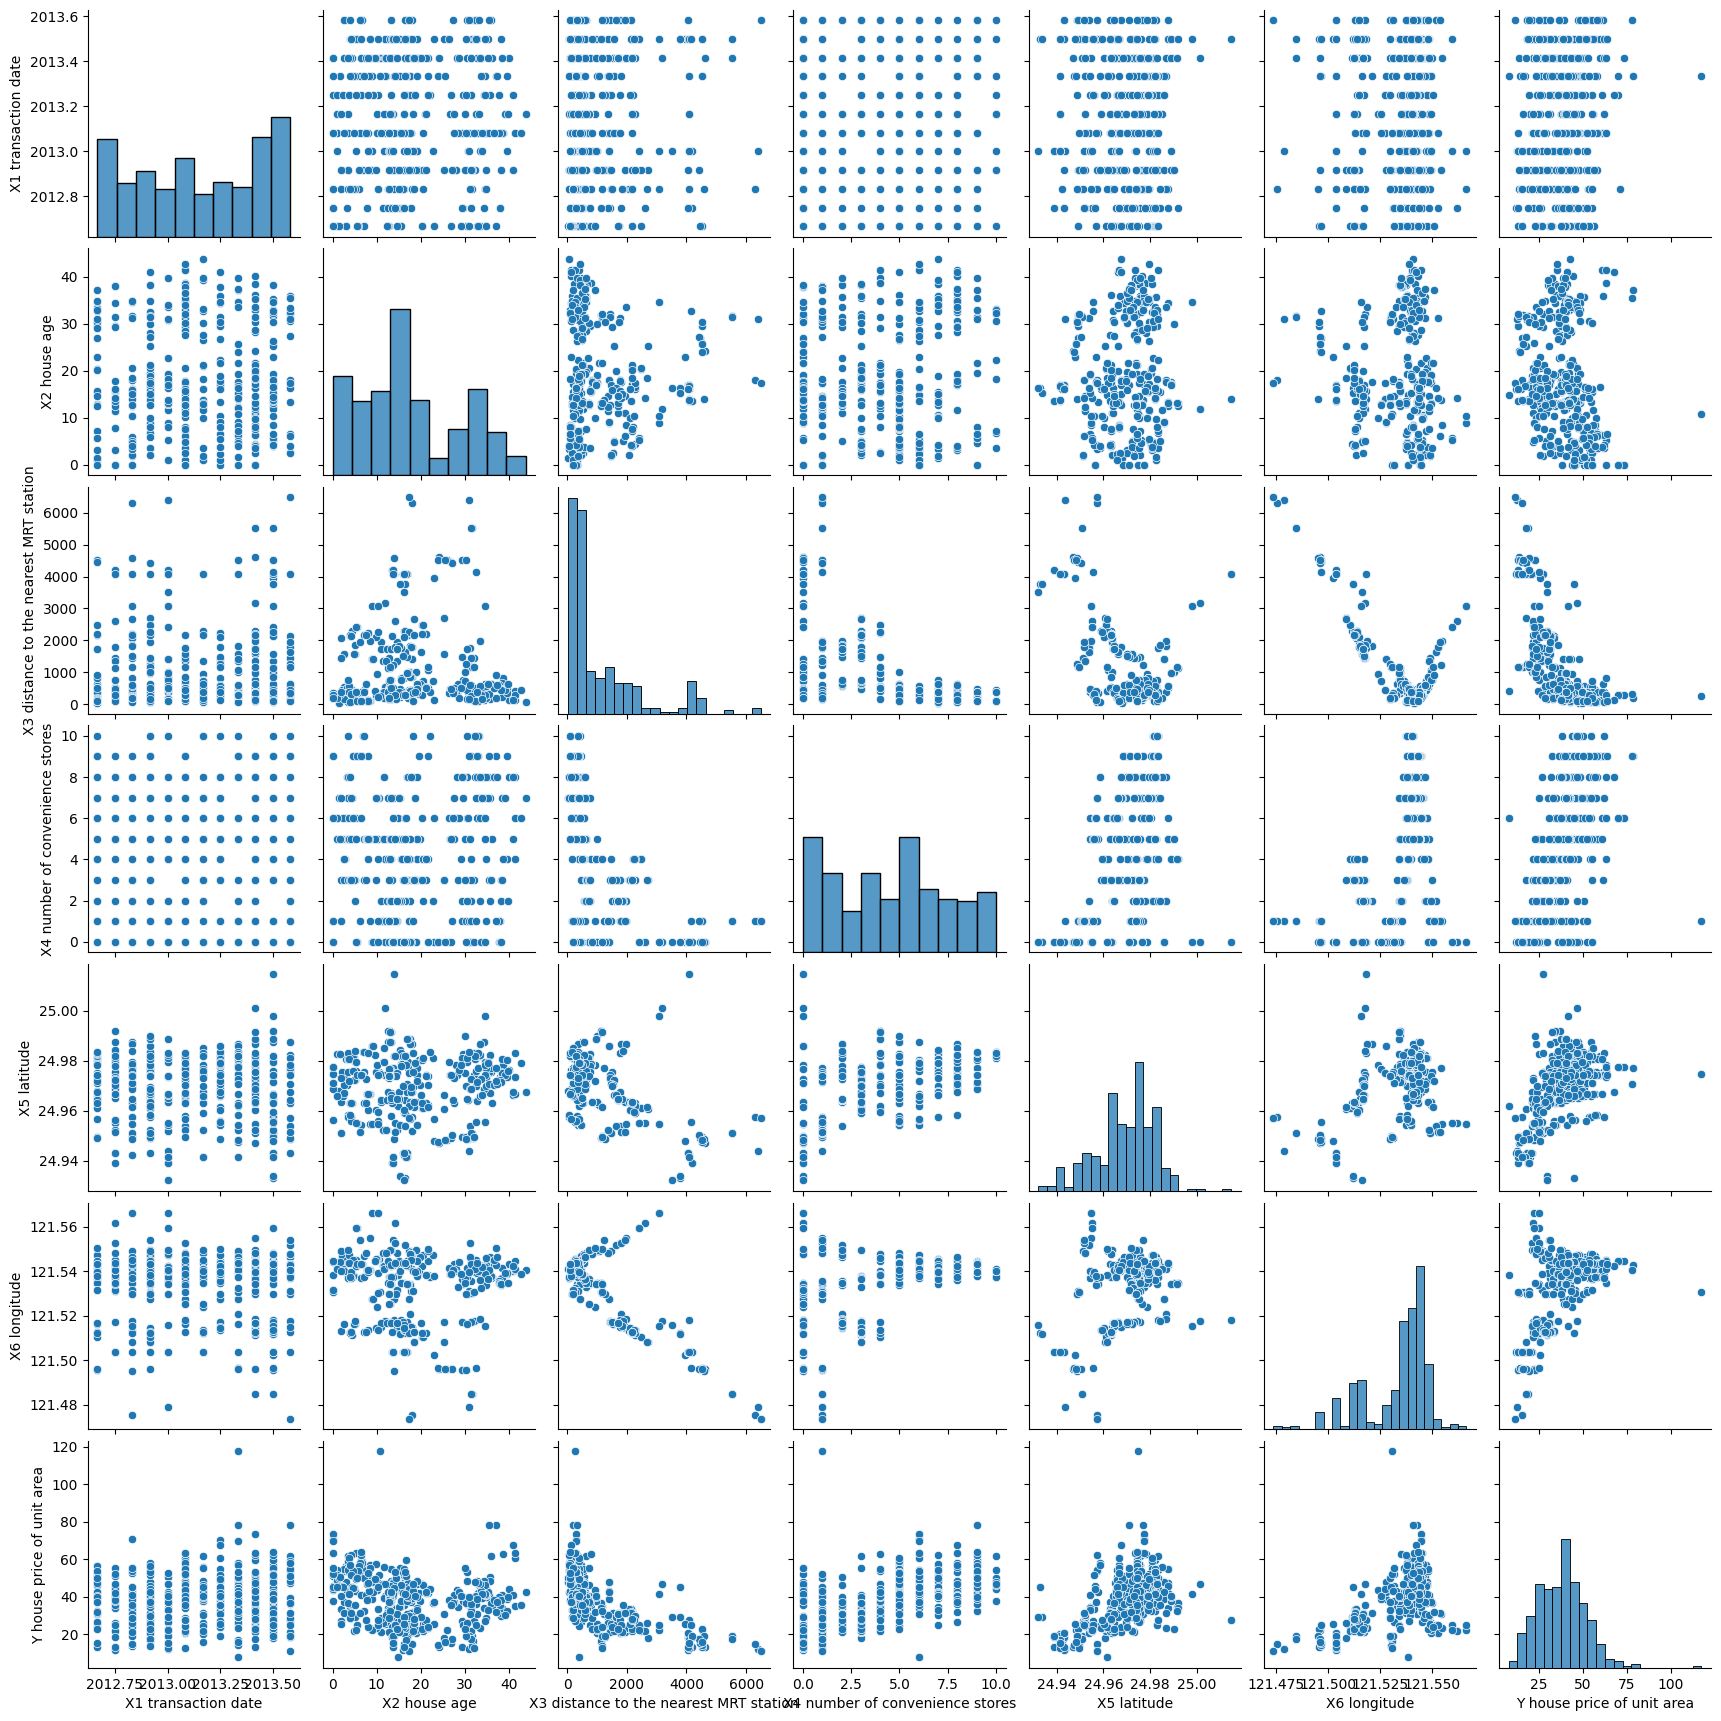

In [68]:
sns.pairplot(data)
#sprawdzam wykresy punktowe 

/var/folders/tp/t4j1rq651fd35zfdsj3ssyg00000gn/T/ipykernel_16123/207854718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Y house price of unit area'])


<Axes: xlabel='Y house price of unit area', ylabel='Density'>

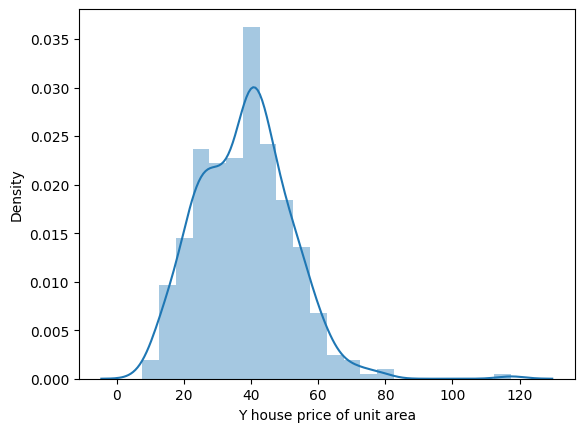

In [69]:
sns.distplot(data['Y house price of unit area'])
#sprawdzam czy zmienna y ma rozklad normalny

<Axes: >

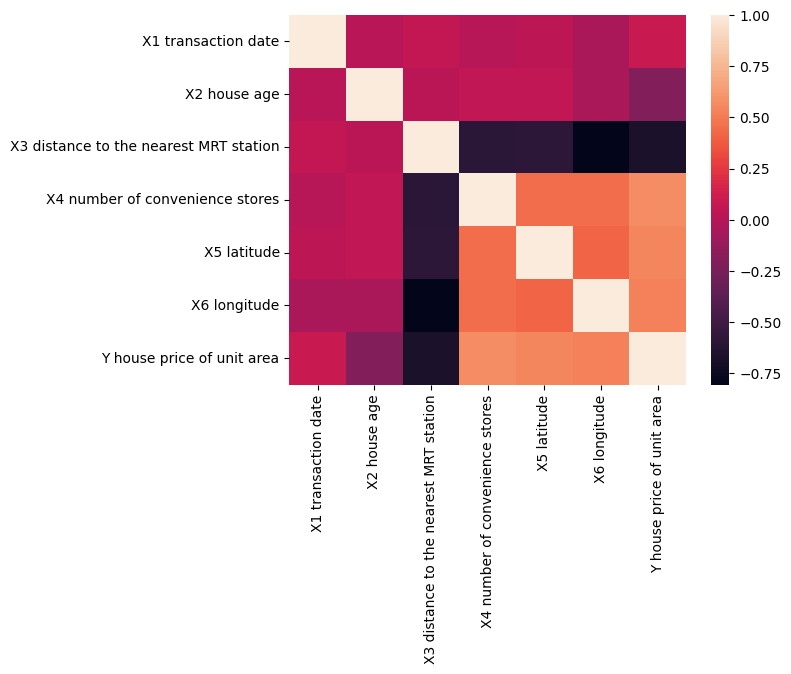

In [70]:
numeric_df = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

In [71]:

# Model regresji 
X = data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude' , 'X6 longitude']]
y = data['Y house price of unit area']


In [43]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()

In [75]:
lm.fit(X_train,y_train)

LinearRegression()

In [76]:
# print  wyraz wolny
print(lm.intercept_)

-12815.542837714263


In [78]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
#OSZACOWANE WSPÓŁCZYNNIKI

,Coefficient
X1 transaction date,5.064142
X2 house age,-0.283627
X3 distance to the nearest MRT station,-0.004815
X4 number of convenience stores,1.002671
X5 latitude,230.625349
X6 longitude,-25.451241


INTERPRETACJA WPLYWU ZMIENNYCH X NA ZMIENNA ZALEZNA Y 

Przy założeniu, że wszystkie inne cechy są stałe: (cena tutaj jako price per unit)

 wzrost wartości zmiennej X1 o 1 rok jest skorelowany z wzrostem ceny o 5.06 jednostki.
 
 wzrost wartości zmiennej X2 o 1 rok jest skorelowany ze spadkiem ceny o 0.28 jednostki.

 wzrost wartości zmiennej X3 o 1 jednostkę (dystansu) jest skorelowany ze spadkiem o 0.0048 jednostki.

 wzrost wartości zmiennej X4 o 1 sklep jest skorelowany ze wzrostem ceny o 1.00 jednostki.

 wzrost wartości zmiennej latitude o X5 o jednostkę jest skorelowany z wzrostem ceny o 230.63 jednostki.

 wzrost wartości zmiennej X6 o 1 jednostkę jest skorelowany ze spadkiem ceny o 25.45 jednostki.


In [79]:
predictions = lm.predict(X_test)
#dokonujemy predykcji

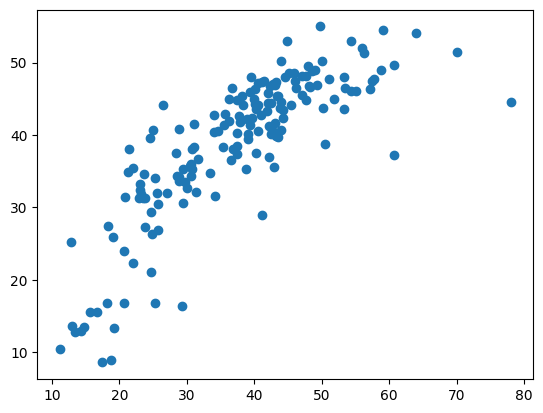

In [80]:
plt.scatter(y_test,predictions)
#rzeczywiste ceny naszych nieruchomosci porownujemy z predykcjami na wykresie punktowym

/var/folders/tp/t4j1rq651fd35zfdsj3ssyg00000gn/T/ipykernel_16123/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


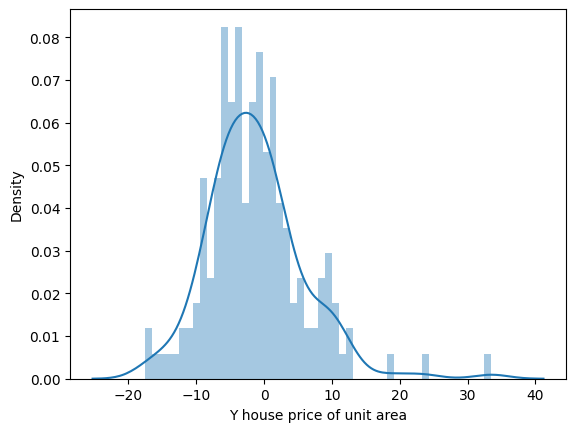

In [81]:
sns.distplot((y_test-predictions),bins=50);

In [82]:
from sklearn import metrics

In [86]:
#miary dipasowania
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.466522594037501
MSE: 52.21096548144219
RMSE: 7.225715568816848


Wynik MAE wynoszący około 5.47 oznacza, że średnio model jest w błędzie o około 5.47 jednostek (price per unit). Oznacza to, że model średnio przewiduje wartości, które różnią się od rzeczywistych o około 5.47 jednostek.

MSE wynoszący około 52.21  oznacza, ze nasz model ma średni kwadratowy błąd rzędu 52.21, co sugeruje, że istnieją nieliczne przypadki, gdzie błędy prognoz mogą być znacząco większe.

RMSE wynoszące około 7.23 , oznacza to, że nasze przewidywania, średnio, różnią się od rzeczywistych danych o około 7.23 jednostki.

In [87]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
import statsmodels.api as sm

In [89]:
model =  sm.OLS(y_train, X_train)

In [90]:
results = model.fit()

In [91]:
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.943
Model:                                    OLS   Adj. R-squared (uncentered):              0.942
Method:                         Least Squares   F-statistic:                              673.5
Date:                        Sat, 02 Dec 2023   Prob (F-statistic):                   6.73e-148
Time:                                16:47:23   Log-Likelihood:                         -916.71
No. Observations:                         248   AIC:                                      1845.
Df Residuals:                             242   BIC:                                      1867.
Df Model:                                   6                                                  
Covariance Type:                    nonrobust                                                  
                                        

opis wyników :

R kwadrat oznacza ze model wyjasnia nam 94.3% zmienności zmiennej Y  na podstawie zmiennych X.

Wysoka wartosc Fstatistic oraz niska wartosc p-value oznacza ze nasz model jest statystycznie istotny.

Nasz model regresji jest dobrze dopasowany do danych.



Z modelu wynika ze wszystkie zmienne niezlaezna sa statystycznie istotne (patrzac na pvalue <0,05) 

z kazda jednostka daty transakcji wzrasta o 4,0681 cena mieszkania za jednostke powierzchni 

czym dom jest starszy o 1 jednostke tym cena nieruchomosci za jednostke powierzchni spada o 0,2864 jednostki

czym dalej o 1 jednostke dystansu do metra tym cena nieruchomosci za jednostke powierzchni spada o 0,0058 jednostki ceny 

jesli liczba sklepow rosnie o 1 sklep to cena staje sie wyzsza o 1,0043 jednostki

i analogicznie ze zmiennymi latitude oraz longitude


Wyniki wydaje mi sie logicznie poniewaz im starsze mieszkanie tym mniej atrakcyjne dla kupca, rowniez w dzisiejszych czasach bliskosc do stacji metra czy innych przystanklow transportu publicznego wydaje sie waznym aspektem. Jeśli chodzi o bliskość do sklepów to jest to równie wany aspekt w codzienności, który wpływa na wygodę mieszkańca.

Omnibus: To test statystyczny służący do oceny założenia o normalności reszt, jest on o wartości 145.974 z niskim p-value (0.000) sugeruje, że założenie o normalności reszt modelu nie jest spełnione. 

Durbin-Watson: Wynik o wartości 2.116 nie wskazuje na silną autokorelację, co sugeruje brak silnej korelacji pomiędzy resztami modelu.

JB:test na normalność rozkładu reszt modelu, wartosc JB wynosząca 1927.881 z niskim p-value (0.00) potwierdza wcześniejsze wnioski z testu Omnibus, że reszty modelu nie są rozkładem normalnym.

Skew: Wartość skośności 2.031 mówi nam o asymetrii rozkładu reszt. Skośność większa od zera sugeruje, że rozkład jest asymetryczny w prawo

Kurtosis: Wartość kurtozy 16.041 jest wysoka i oznacza, że rozkład jest bardziej "spiczasty" niż rozkład normalny


Podsumowując, wyniki te wskazują na potencjalne problemy z modelem. Reszty nie wykazują normalności, co może oznaczać, że model ma trudności z dokładnym odwzorowaniem rzeczywistości. Dodatkowo, wysoki wynik kurtozy i wartość Cond. No. sugerują, że model może mieć problemy z wieloliniowością lub współliniowością zmiennych niezależnych.